### This code was written by Aysan Hemmati, student number = 99170207

### libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### data extraction from the csv file:


In [190]:
df = pd.read_csv('DistMod.csv')
zcmb = df['zcmb']
mb = df['mb'] #apparent magnitude
dmb = df['dmb'] #apparent magnitude error

### input values 

In [191]:
H0 = 70
q0 = 0 
M = -19.27

### define curve

In [192]:
def curve(q0, H0, z):
    m = M + 43.23-(5*np.log10(H0 / 68)) + 5*np.log10(z) + 1.086*(1-q0)*z
    return m

### scatter plot:

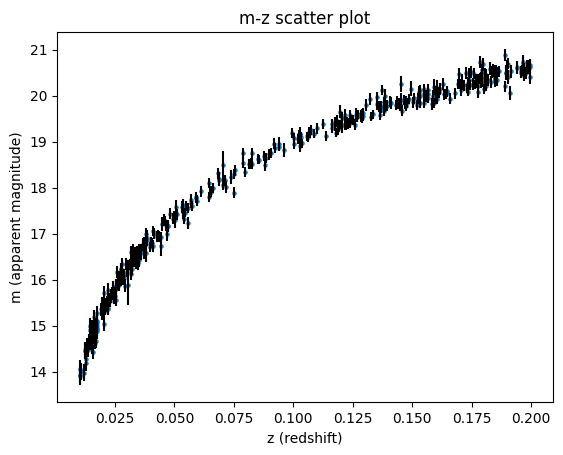

In [193]:
plt.scatter(zcmb , mb , s = 5)
plt.title("m-z scatter plot")
plt.ylabel("m (apparent magnitude)")
plt.xlabel("z (redshift)")
plt.errorbar(zcmb, mb,yerr = dmb, fmt='none',ecolor = 'black',color='yellow') 
plt.show()

fit 1:
H0 = 0
q0 = 0

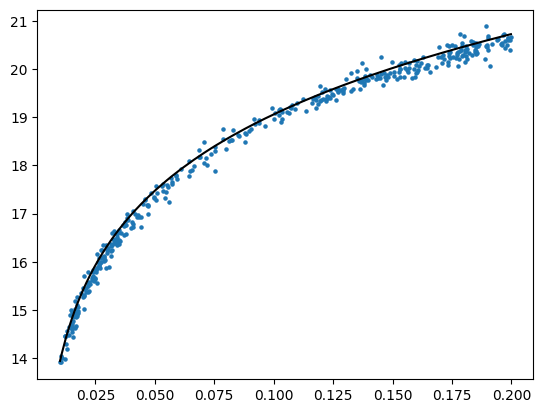

In [194]:
q0 = -0.5
H0 = 70
plt.scatter(zcmb , mb , s = 5)
x_curve = zcmb
y_curve = curve(q0,H0,zcmb)
plt.plot(x_curve,y_curve,color = 'black')
plt.show()

# A)
### with trial and error we can find out that:
## -1<q0<1

and 

## 65<H0<75

### penalty function

In [195]:
def penalty(m , z , H0, q0, dm):
    chi = (m - curve(q0 , H0, z))/dm
    return (chi)**2

## phase space

In [196]:
'''
# Create x and y values
q0_ax = np.linspace(-5, 5, 100)
H0_ax = np.linspace(60, 90, 100)

chi2_array = np.empty((100,100))
for i in range(0 ,100):
   for j in range(0 ,100):
        q = q0_ax[i]
        h = H0_ax[j]
        total = 0
        for k in range(0,len(mb)):
            total += penalty(mb[k],zcmb[k],h,q,dmb[k])
        chi2_array[i][j] = total

plt.imshow(chi2_array , origin = 'lower')
plt.colorbar()
plt.show()


X, Y = np.meshgrid(q0_ax, H0_ax)
Z = chi2_array
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf)
plt.show()
'''


"\n# Create x and y values\nq0_ax = np.linspace(-5, 5, 100)\nH0_ax = np.linspace(60, 90, 100)\n\nchi2_array = np.empty((100,100))\nfor i in range(0 ,100):\n   for j in range(0 ,100):\n        q = q0_ax[i]\n        h = H0_ax[j]\n        total = 0\n        for k in range(0,len(mb)):\n            total += penalty(mb[k],zcmb[k],h,q,dmb[k])\n        chi2_array[i][j] = total\n\nplt.imshow(chi2_array , origin = 'lower')\nplt.colorbar()\nplt.show()\n\n\nX, Y = np.meshgrid(q0_ax, H0_ax)\nZ = chi2_array\n# Create a 3D plot\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nsurf = ax.plot_surface(X, Y, Z, cmap='viridis')\nfig.colorbar(surf)\nplt.show()\n"

# MCMC:

acceptance rate = 25.041999999999998


Text(0, 0.5, 'q0')

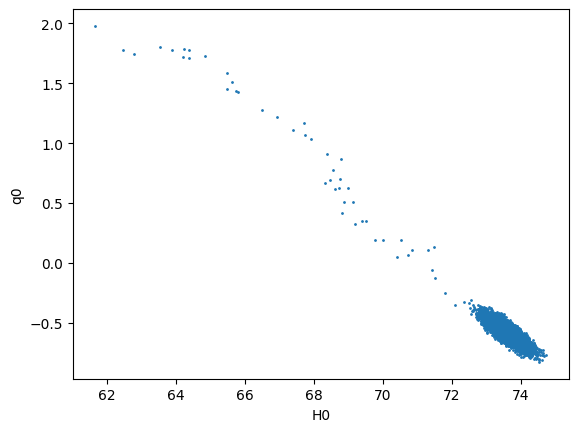

In [197]:
import random
#find random starting point in phase space 
point_q = np.random.uniform(-2, 2)
point_h = np.random.uniform(60,80)
start = (point_q , point_h)

nmcmc = 50000
q_sigma = 0.08
h_sigma = 0.45

#point1:
chi2_1 = 0
for k in range(0,len(mb)):
    chi2_1 += penalty(mb[k],zcmb[k],point_h,point_q,dmb[k])

w_list = []
chi2_1_list  = []
point_q_list = []
point_h_list = []
acceptance = 0 
points = []

w = 1
for i in range(0,nmcmc):
    
    q_step = np.random.normal(loc=0 , scale=q_sigma)
    h_step = np.random.normal(loc=0 , scale=h_sigma)
    
    new_q = point_q + q_step
    new_h = point_h + h_step
    
    chi2_2 = 0
    for k in range(0,len(mb)):
        chi2_2 += penalty(mb[k],zcmb[k],new_h,new_q,dmb[k])

    r = random.random()

    if r < np.exp(chi2_1 - chi2_2):
            x=np.zeros((1,3))
            chi2_1_list.append(chi2_2)
            chi2_1 = chi2_2
            point_q_list.append(new_q)
            x[0,0] = new_q
            point_q = new_q
            point_h_list.append(new_h)
            x[0,1] = new_h
            point_h = new_h
            acceptance += 1
            w_list.append(w)
            x[0,2]=w
            points.append(x)
            w=1
    else:
         w += 1
         pass
acceptance_rate = acceptance/nmcmc
print("acceptance rate =",acceptance_rate*100 )

plt.scatter(point_h_list,point_q_list, s = 1)
plt.xlabel("H0")
plt.ylabel("q0")


### What is the output of MCMC?

In [198]:
print(points)
#(q,h,w)

[array([[ 1.97851895, 61.66148283,  1.        ]]), array([[ 1.77674943, 62.45036205,  1.        ]]), array([[ 1.74573348, 62.77598742,  2.        ]]), array([[ 1.80036681, 63.54835282,  2.        ]]), array([[ 1.77955655, 63.88914828,  2.        ]]), array([[ 1.78622249, 64.23404347,  1.        ]]), array([[ 1.77772513, 64.36841666,  1.        ]]), array([[ 1.71933814, 64.20752344,  2.        ]]), array([[ 1.71037667, 64.38615563,  2.        ]]), array([[ 1.72740013, 64.84928193,  2.        ]]), array([[ 1.58581424, 65.47362897,  1.        ]]), array([[ 1.50986329, 65.61861247,  3.        ]]), array([[ 1.45484946, 65.47820734,  6.        ]]), array([[ 1.43892192, 65.75072534,  1.        ]]), array([[ 1.42990684, 65.79484702,  3.        ]]), array([[ 1.27695386, 66.5003171 ,  1.        ]]), array([[ 1.21637674, 66.93920939,  1.        ]]), array([[ 1.17025881, 67.72653776,  1.        ]]), array([[ 1.11015257, 67.39568688,  4.        ]]), array([[ 1.06497795, 67.74077215,  4.        ]]),

### eliminating the burn-in phase:

Text(0, 0.5, 'q0')

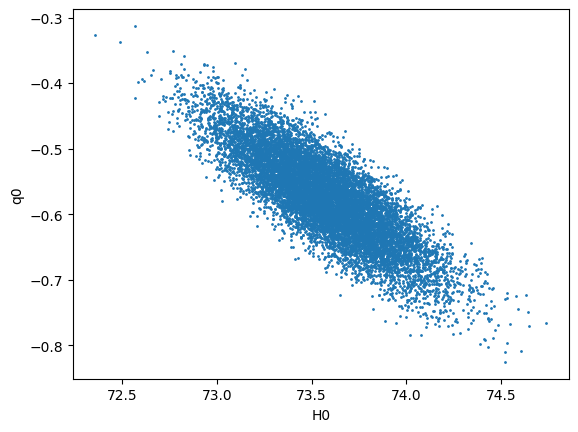

In [199]:
# Calculate the index corresponding to 10% of the array length
q_burn_index = int(len(point_q_list) * 0.1)
h_burn_index = int(len(point_h_list) * 0.1)
point_burn_index = int(len(points)*0.1)
# Delete the first 10% of values
new_q_list= point_q_list[q_burn_index:]
new_h_list= point_h_list[h_burn_index:]
new_point_list = points[point_burn_index:]

plt.scatter(new_h_list,new_q_list, s = 1)
plt.xlabel("H0")
plt.ylabel("q0")

### creating a grid, calculating the weight array 

In [200]:
q_min = np.min(new_q_list)
q_max = np.max(new_q_list)
h_min = np.min(new_h_list)
h_max = np.max(new_h_list)

boxes = []
l_q = 0.01
l_h = 0.05

for i in range(0 , len(new_point_list)):
    box = np.zeros((1,3))
    lower_limit_q =  float(new_point_list[i][0,0]//l_q)
    box[0,0] = lower_limit_q
    lower_limit_h = float(new_point_list[i][0,1]//l_h)
    box[0,1] = lower_limit_h
    box[0,2] = new_point_list[i][0,2]
    boxes.append(box)

grid_numbers_q = np.arange(q_min, q_max, l_q )//l_q
grid_numbers_h = np.arange(h_min, h_max, l_h )//l_h

array = np.zeros((len(grid_numbers_q),len(grid_numbers_h)))

for i in range(len(grid_numbers_q)):
    for j in range(len(grid_numbers_h)):
        x = grid_numbers_q[i]
        y = grid_numbers_h[j]
        box_counter = 0
        for point_idx in range(len(new_point_list)):  
                box = boxes[point_idx]
                if box[0,0] == x and box[0,1] == y:
                    box_counter+=box[0,2]
                else:
                    pass
        array[i, j] = box_counter

### visualising the weight array in 2D

([<matplotlib.axis.YTick at 0x1df066ced50>,
 [Text(0, 0.0, '72.359'),
  Text(0, 12.0, '72.954'),
  Text(0, 24.0, '73.549'),
  Text(0, 36.0, '74.144'),
  Text(0, 48.0, '74.739')])

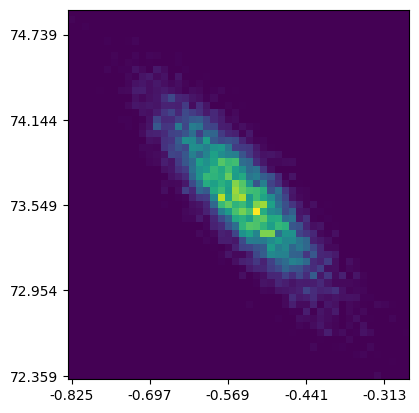

In [201]:
plt.imshow(array,origin = "lower")
x_ax = np.linspace(q_min,q_max,5)
y_ax = np.linspace(h_min,h_max,5)
x_ticks = np.linspace(0,44,5)
y_ticks = np.linspace(0,48,5)
x_tick_labels = np.round(x_ax,3)
y_tick_labels = np.round(y_ax,3)
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks,y_tick_labels)

In [202]:
print(np.shape(array))

(52, 48)


### visualising the weight array in 3D

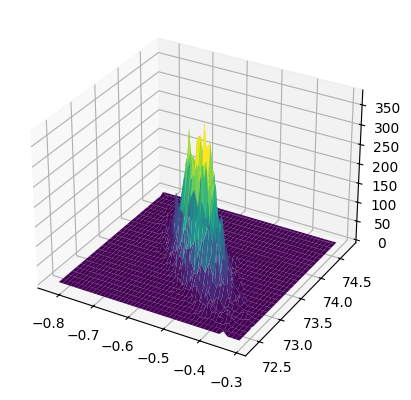

In [203]:

x = np.linspace(q_min,q_max,array.shape[1])

y = np.linspace(h_min,h_max,array.shape[0])


X,Y = np.meshgrid(x,y)
Z = array 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


### choosing multiple starting points

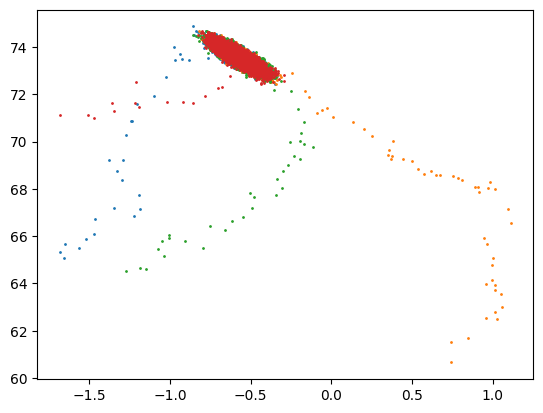

mean acceptance rate = 0.251975


In [228]:
import random
#find random starting point in phase space 
point_q_1 = np.random.uniform(-2, 2)
point_h_1 = np.random.uniform(60,80)
start_1  = (point_q_1 , point_h_1)
start 
point_q_2 = np.random.uniform(-2, 2)
point_h_2 = np.random.uniform(60,80)
start_2  = (point_q_2 , point_h_2)

point_q_3 = np.random.uniform(-2, 2)
point_h_3 = np.random.uniform(60,80)
start_3  = (point_q_3 , point_h_3)

point_q_4 = np.random.uniform(-2, 2)
point_h_4 = np.random.uniform(60,80)
start_4  = (point_q_4 , point_h_4)

nmcmc = 50000
q_sigma = 0.08
h_sigma = 0.45

starts = [start_1,start_2,start_3,start_4]
acceptance_rates = []
point_q_list_of_lists = []
point_h_list_of_lists = []

#point1:
for start in starts:
    point_q = start[0]
    point_h = start[1]
    chi2_1 = 0
    for k in range(0,len(mb)):
        chi2_1 += penalty(mb[k],zcmb[k],point_h,point_q,dmb[k])

    w_list = []
    chi2_1_list  = []
    point_q_list = []
    point_h_list = []
    acceptance = 0 
    points = []

    w = 1
    for i in range(0,nmcmc):
    
        q_step = np.random.normal(loc=0 , scale=q_sigma)
        h_step = np.random.normal(loc=0 , scale=h_sigma)
    
        new_q = point_q + q_step
        new_h = point_h + h_step
    
        chi2_2 = 0
        for k in range(0,len(mb)):
            chi2_2 += penalty(mb[k],zcmb[k],new_h,new_q,dmb[k])

        r = random.random()

        if r < np.exp(chi2_1 - chi2_2):
                x=np.zeros((1,3))
                chi2_1_list.append(chi2_2)
                chi2_1 = chi2_2
                point_q_list.append(new_q)
                x[0,0] = new_q
                point_q = new_q
                point_h_list.append(new_h)
                x[0,1] = new_h
                point_h = new_h
                acceptance += 1
                w_list.append(w)
                x[0,2]=w
                points.append(x)
                w=1
        else:
            w += 1
            pass
    acceptance_rate = acceptance/nmcmc
    acceptance_rates.append(acceptance_rate)
    point_q_list_of_lists.append(point_q_list)
    point_h_list_of_lists.append(point_h_list)


    

for i in range(0,len(point_h_list_of_lists)):
     x = point_q_list_of_lists[i]
     y = point_h_list_of_lists[i]
     plt.scatter(x,y,s=1)
plt.show()

mean_acceptance_rate = np.mean(acceptance_rates)
print("mean acceptance rate =" , mean_acceptance_rate)


### normalizing the weighted histogram

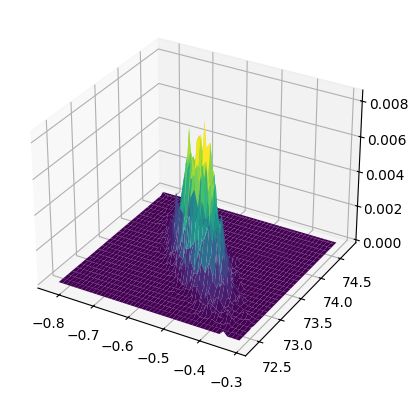

In [205]:
volum = np.sum(array)
normalized_array = array/volum 
x = np.linspace(q_min,q_max,array.shape[1])
y = np.linspace(h_min,h_max,array.shape[0])
X,Y = np.meshgrid(x,y)
Z = normalized_array 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()
shape_tuple = normalized_array.shape
num_rows, num_columns = shape_tuple


### How do contours work? (a visual view)

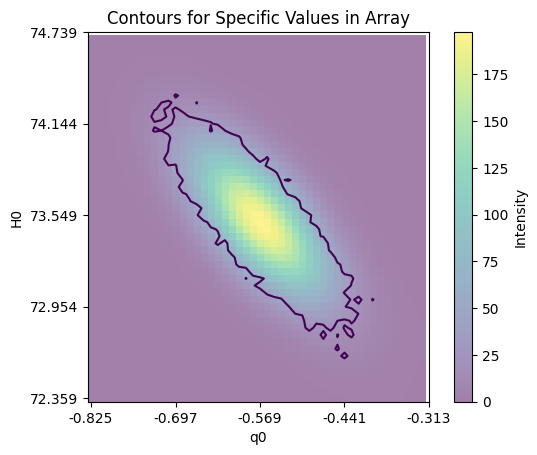

In [206]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

z_values = [20]  # Example values for contours
X, Y = np.meshgrid(np.arange(array.shape[1]), np.arange(array.shape[0]))
smoothed = gaussian_filter(array, 3)
plt.contour(X, Y, array, levels=z_values)
plt.imshow(smoothed, cmap='viridis', origin='lower', alpha=0.5)
x_ax = np.linspace(q_min,q_max,5)
y_ax = np.linspace(h_min,h_max,5)
x_ticks = np.linspace(0,array.shape[1],5)
y_ticks = np.linspace(0,array.shape[0],5)
x_tick_labels = np.round(x_ax,3)
y_tick_labels = np.round(y_ax,3)
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks,y_tick_labels)
plt.xlabel('q0')
plt.ylabel('H0')
plt.title('Contours for Specific Values in Array')
plt.colorbar(label='Intensity')
plt.show()


### finding the 1 sigma and 2 sigma mark

In [207]:
z_max = np.max(array)
whole_volume = np.sum(array)
zs = np.arange(start = 0 , stop = z_max , step = 1)
shape_tuple = array.shape
num_rows, num_columns = shape_tuple

volumes = []
vol_ratio = []
for i in range(0 , len(zs)):
    new_z = zs[i:]
    z_volume = 0
    for z in new_z :
        w_counter = 0
        surface_points = np.argwhere(array==z)
        for point in surface_points:
            x = point[0]
            y = point[1]
            w = array[x,y]
            
            w_counter += w
        z_volume+=w_counter
    volumes.append(z_volume)
    ratio = z_volume/whole_volume
    vol_ratio.append(ratio)
target_value_1 = 0.68
target_value_2 = 0.95
ratio_array = np.array(vol_ratio)
closest_index_1_sigma = np.argmin(np.abs(ratio_array - target_value_1))
closest_index_2_sigma = np.argmin(np.abs(ratio_array - target_value_2))
print("Index for 1 sigma:", closest_index_1_sigma)
print("Index for 2 sigma:", closest_index_2_sigma)

print("Closest z value for 1 sigma:", zs[closest_index_1_sigma])
print("Closest z value for 2 sigma:", zs[closest_index_2_sigma])


Index for 1 sigma: 113
Index for 2 sigma: 18
Closest z value for 1 sigma: 113.0
Closest z value for 2 sigma: 18.0


## The 1-sigma and 2-sigma contours in 2D and planes in 3D:
1-sigma contour is the level which contains 68% of the whole volume. 

### the contour and plane are colored yellow.


1-sigma contour is the level which contains 68% of the whole volume. 

### the contour and plane are colored purple.

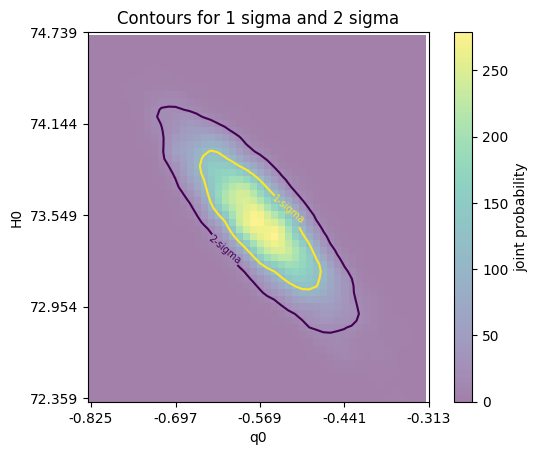

In [208]:
z_values = [closest_index_2_sigma , closest_index_1_sigma]  
X, Y = np.meshgrid(np.arange(array.shape[1]), np.arange(array.shape[0]))
smoothed = gaussian_filter(array, 1)
fmt = {}
CS = plt.contour(X, Y, smoothed, levels=z_values)
strs = ['2-sigma', '1-sigma']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
plt.clabel(CS, inline=True, fmt=fmt, fontsize=7)
plt.imshow(smoothed, cmap='viridis', origin='lower', alpha=0.5)
x_ax = np.linspace(q_min,q_max,5)
y_ax = np.linspace(h_min,h_max,5)
x_ticks = np.linspace(0,array.shape[1],5)
y_ticks = np.linspace(0,array.shape[0],5)
x_tick_labels = np.round(x_ax,3)
y_tick_labels = np.round(y_ax,3)
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks,y_tick_labels)
plt.xlabel('q0')
plt.ylabel('H0')
plt.title('Contours for 1 sigma and 2 sigma')
plt.colorbar(label='joint probability')
plt.show()

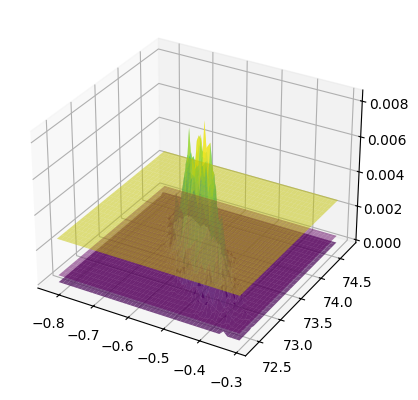

In [209]:
x = np.linspace(q_min,q_max,array.shape[1])
y = np.linspace(h_min,h_max,array.shape[0])
X,Y = np.meshgrid(x,y)
Z = normalized_array
normalized_zs = []
for z in zs:
    norm_z = z/whole_volume
    normalized_zs.append(norm_z)

# Create a plane at a specific z values
z_plane_1 = normalized_zs[closest_index_1_sigma]  
xx, yy = np.meshgrid(x, y)
plane_1 = np.zeros((array.shape))+z_plane_1  
z_plane_2 = normalized_zs[closest_index_2_sigma]
xx, yy = np.meshgrid(x, y)
plane_2 = np.zeros((array.shape))+z_plane_2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.plot_surface(xx, yy, plane_1, color='yellow', alpha=0.5)  
ax.plot_surface(xx, yy, plane_2, color='purple', alpha=0.5)

plt.show()

## Marginalization:

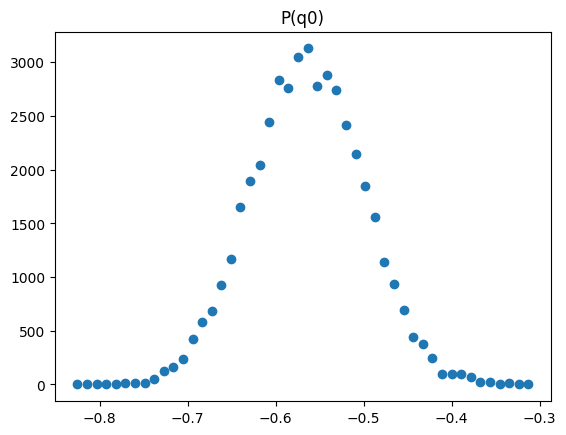

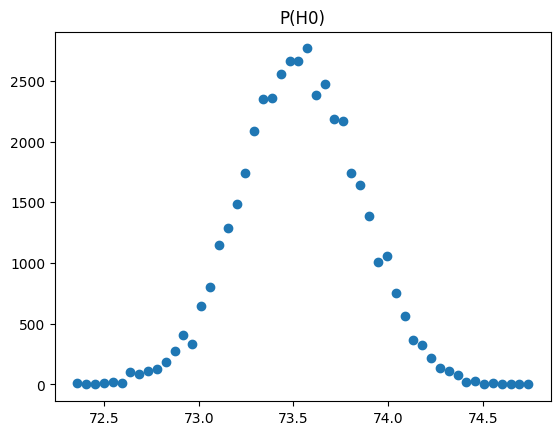

In [210]:
x = np.linspace(q_min,q_max,array.shape[1])
y = np.linspace(h_min,h_max,array.shape[0])

p_q = []
for i in range(0 , len(x)): 
    p_i = 0
    for j in range(0 , len(y)): 
        p = array[j][i]
        p_i+=p
    p_q.append(p_i)
plt.scatter(x  , p_q)
plt.title("P(q0)")
plt.show()

p_h = []
for i in range(0 , len(y)): 
    p_j = 0
    for j in range(0 , len(x)): 
        p_prime = array[i][j]
        p_j+=p_prime
    p_h.append(p_j)
plt.scatter(y  , p_h)
plt.title("P(H0)")
plt.show()

### 1-sigma for p(q0):

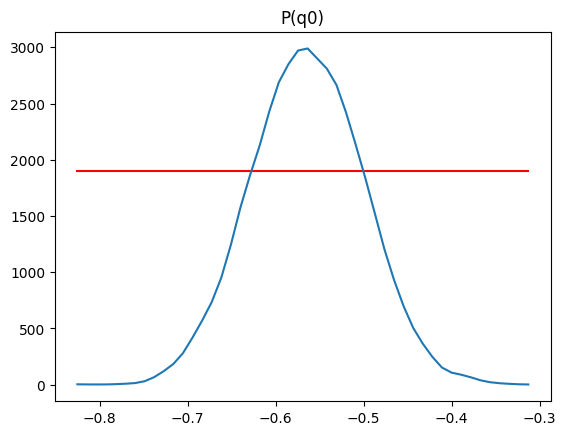

In [224]:
areas_q = []
ratios_q = []
for p in range(0 , len(p_q)):
    area_for_q = 0
    for i in range(0 , len(x)):
        if p_q[i]>= p_q[p]:
            area_for_q = area_for_q + p_q[i]
        else: 
            pass
    ratio_q = area_for_q/np.sum(p_q)
    areas_q.append(area_for_q)
    ratios_q.append(ratio_q)

target_value_1 = 0.68
area_ratio_array_q = np.array(ratios_q)
closest_index_1_sigma_q = np.argmin(np.abs(area_ratio_array_q - target_value_1))

sigma_1_q = p_q[closest_index_1_sigma_q]
x_line_q = x 
y_line_q = [sigma_1_q for x in x_line_q] 

fig, ax = plt.subplots()
plt.plot(x_line_q, y_line_q, color='red', linestyle='-', label='My Line')
smoothed_pq = gaussian_filter(p_q, 1)
plt.plot(x  , smoothed_pq)
plt.title("P(q0)")
plt.show()

### 1-sigma for p(H0):

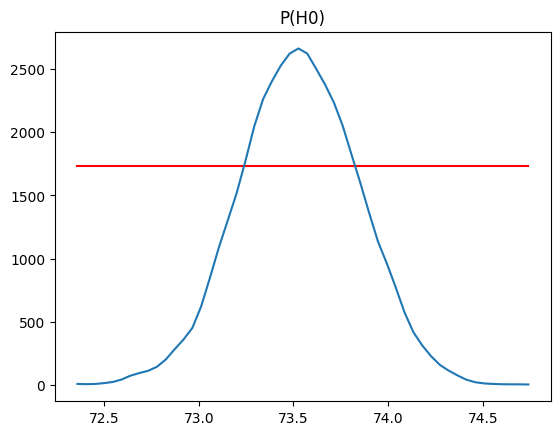

In [225]:
areas = []
ratios = []
for p in range(0 , len(p_h)):
    area_for_p = 0
    for i in range(0 , len(y)):
        if p_h[i]>= p_h[p]:
            area_for_p = area_for_p + p_h[i]
        else: 
            pass
    ratio = area_for_p/np.sum(p_h)
    areas.append(area_for_p)
    ratios.append(ratio)

target_value_1 = 0.68
area_ratio_array = np.array(ratios)
closest_index_1_sigma = np.argmin(np.abs(area_ratio_array - target_value_1))

sigma_1 = p_h[closest_index_1_sigma]
x_line = y  
y_line = [sigma_1 for x in x_line]  
fig, ax = plt.subplots()

ax.plot(x_line, y_line, color='red', linestyle='-', label='My Line')
smoothed_ph = gaussian_filter(p_h, 1)
ax.plot(y  , smoothed_ph)
plt.title("P(H0)")
plt.show()

## Errors:

### 1- after finding the p(H0) , P(q0) level at which the 1-sigma limit lies, we have to find where the 1-sigma line intersects with the probability plot. This results in 2 black points on the plots shown bellow.


### 2- next, we have to find the mean value of q0 and H0, marked by red points on the plots shown bellow. The difference between each black dot and the red point gives us the positive and negative 1-sigma error values.


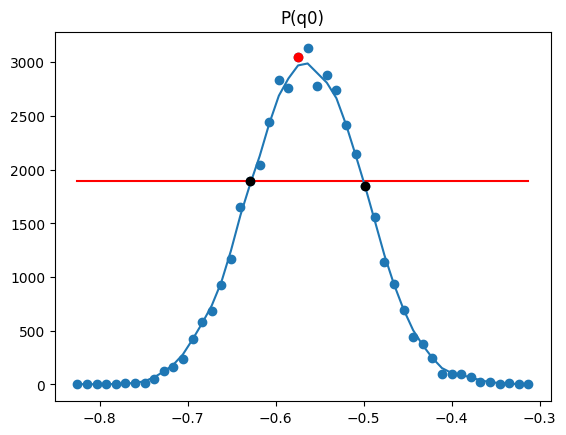

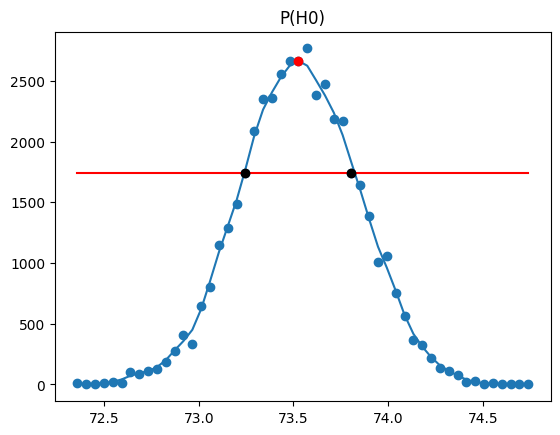

In [227]:
def find_closest_indices(arr, target_value, num_indices=3):
    return sorted(range(len(arr)), key=lambda i: abs(arr[i] - target_value))[:num_indices]
target_q = p_q[closest_index_1_sigma_q]
closest_indices_q = find_closest_indices(p_q, target_q, num_indices=3)
mean_q = np.mean(x)
closest_indices_mean_q = find_closest_indices(x , mean_q,1)

fig, ax = plt.subplots()
ax.plot(x_line_q, y_line_q, color='red', linestyle='-', label='My Line')
smoothed_pq = gaussian_filter(p_q, 1)
ax.plot(x  , smoothed_pq)
ax.scatter(x,p_q)
ax.plot(x[closest_index_1_sigma_q], p_q[closest_index_1_sigma_q] ,color = 'black', marker='o')
ax.plot(x[closest_indices_q[1]], p_q[closest_indices_q[1]] ,color = 'black', marker='o')
ax.plot(x[closest_indices_mean_q[0]], p_q[closest_indices_mean_q[0]] ,color ='red', marker='o')
plt.title("P(q0)")
plt.show()

error_plus_q = abs(x[closest_indices_q[1]] - x[closest_indices_mean_q[0]])
error_minus_q = abs(x[closest_index_1_sigma_q] - x[closest_indices_mean_q[0]])

mean_h = np.mean(y)
closest_indices_mean_h = find_closest_indices(y , mean_h,1)

target_h = p_h[closest_index_1_sigma]
closest_indices_h = find_closest_indices(p_h, target_h, num_indices=3)

sigma_1 = p_h[closest_index_1_sigma]
x_line = y  
y_line = [sigma_1 for x in x_line]  # Y-coordinates for the line
fig, ax = plt.subplots()
# Add the straight line
ax.plot(x_line, y_line, color='red', linestyle='-', label='My Line')
smoothed_ph = gaussian_filter(p_h, 1)
ax.scatter(y  , p_h)
ax.plot(y  , smoothed_ph)
ax.plot(y[closest_index_1_sigma], p_h[closest_index_1_sigma] ,color = 'black', marker='o')
ax.plot(y[closest_indices_h[1]], p_h[closest_indices_h[1]] ,color = 'black', marker='o')
ax.plot(y[closest_indices_mean_h[0]], p_h[closest_indices_mean_h[0]] ,color ='red', marker='o')
plt.title("P(H0)")
plt.show()

error_plus_h = abs(y[closest_indices_h[1]] - y[closest_indices_mean_h[0]])
error_minus_h = abs(y[closest_index_1_sigma] - y[closest_indices_mean_h[0]])


In [215]:
print (" H0 = " , y[closest_indices_mean_h[0]], "( +" , error_plus_h , " , -" , error_minus_h, " )") 
print (" q0 = " , x[closest_indices_mean_q[0]], "( +" , error_plus_q , " , -" , error_minus_q, " )")

 H0 =  73.526080921244 ( + 0.32668768034233153  , - 0.28001801172199237  )
 q0 =  -0.5745340771347319 ( + 0.07634159526683687  , - 0.054529710904883455  )


# Result : 

###  H0 =  73.526080921244 ( + 0.32668768034233153  , - 0.28001801172199237  )


### q0 =  -0.5745340771347319 ( + 0.07634159526683687  , - 0.054529710904883455  )